In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

In [3]:
df_yield = pd.read_excel('LW_monthly.xlsx')
df_yield = df_yield.rename(columns={'Unnamed: 0':'Date'})

In [4]:
for i in df_yield.columns:
    if i != 'Date':
        df_yield = df_yield.rename(columns={i: i.strip().replace(' ', '')})

In [5]:
df_yield['Date'] = pd.to_datetime(df_yield['Date'], format = '%Y%m')
df_yield['Date'] = df_yield['Date'].dt.strftime('%d-%m-%Y')

In [6]:
# df_yield['Date'] = pd.to_datetime(df_yield['Date'], format = '%Y%m')
# df_yield['Date'] = df_yield['Date'].dt.strftime('%d-%m-%Y')

In [7]:
df_yield['Date'] = pd.to_datetime(df_yield['Date'])

#### Removing observations before 10Y bill not established do same with macro

In [8]:
df_yield = df_yield.loc[122:]

In [9]:
# df_yield[:-12]

### Exploration Data Analysis

In [10]:
df_plot = df_yield[['1m','12m','13m' , '24m', '36m', '48m', '60m', '72m','84m','108m' ,'120m', 'Date']]

In [11]:
df_plot['Year'] = pd.DatetimeIndex(df_yield['Date']).year

C:\Users\Jurre\AppData\Local\Temp/ipykernel_12400/4238148149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Year'] = pd.DatetimeIndex(df_yield['Date']).year


#### Plot of yields

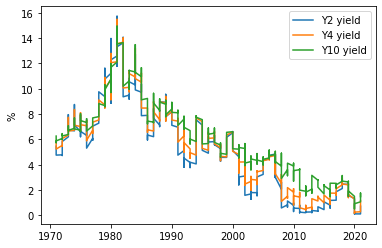

In [12]:
# Plot yields 
x = df_plot['Year']
y2 = df_plot['24m']
y4 = df_plot['48m']
y5 = df_plot['60m']
y7 = df_plot['84m']
y10 = df_plot['120m']

plt.plot(x, y2, label = 'Y2 yield')
# plt.plot(x, y2, label = 'Y2 yield')
# plt.plot(x, y4, label = 'Y4 yield')
plt.plot(x, y4, label = 'Y4 yield')
# #plt.plot(x, y5, label = 'Y5 yield')
# plt.plot(x, y7, label = 'Y7 yield')
plt.plot(x, y10, label = 'Y10 yield')
plt.ylabel('%')
plt.legend()
plt.savefig('Yield_plot.pdf')

#### Change in yields

In [13]:
Change_1 = (df_plot.loc[:,'12m'].diff(12))
Change_2 = df_plot.loc[:, '24m'].diff(12)
Change_3 = (df_plot.loc[:,'36m'].diff(12))
Change_4 = (df_plot.loc[:,'48m'].diff(12))
Change_5 = (df_plot.loc[:,'60m'].diff(12))
Change_7 = (df_plot.loc[:,'84m'].diff(12))
Change_10 = (df_plot.loc[:,'120m'].diff(12))

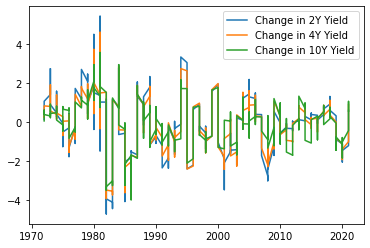

In [14]:
plt.plot(x, Change_2, label = 'Change in 2Y Yield')
plt.plot(x, Change_4, label = 'Change in 4Y Yield')
# plt.plot(x, Change_5 , label = 'Change in 5Y Yield')
# plt.plot(x, Change_7 , label = 'Change in 7Y Yield')
plt.plot(x, Change_10 , label = 'Change in 10Y Yield')
plt.legend()
plt.savefig('Yield_change.pdf')

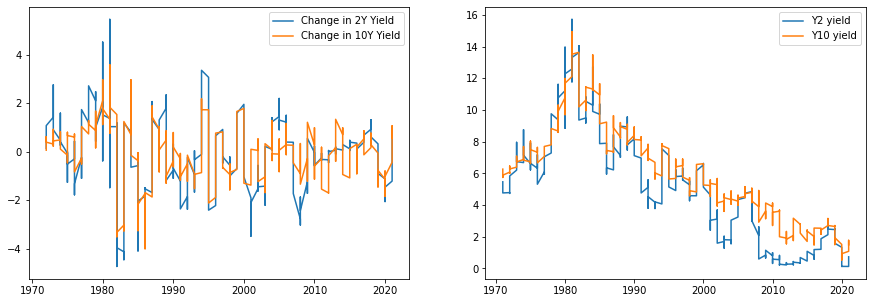

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))

axs[0].plot(x, Change_2, label = 'Change in 2Y Yield')
# axs[0].plot(x, Change_4, label = 'Change in 4Y Yield')
axs[0].plot(x, Change_10 , label = 'Change in 10Y Yield')
axs[0].legend()

axs[1].plot(x, y2, label = 'Y2 yield')
# axs[1].plot(x, y4, label = 'Y4 yield')
axs[1].plot(x, y10, label = 'Y10 yield')
axs[1].legend()

plt.savefig('Change_and_yield.pdf')


### Create Excess Return

In [16]:
import numpy as np

In [17]:
# def excess_ret(n, yields, idx):
#     xrets = -(n -1) * (yields.iloc[idx].shift(-12)[:-12] - yields.iloc[idx+12][:-12]) + (yields.iloc[idx+12][:-12] -df_yield.loc[:, '12m'][:-12])
#     return xrets
                                                                                        

In [18]:
# # Creating excess return for maturities 2,3,4,5,7,10
excess_2y  =  - (2-1) * (df_yield.loc[:, '12m'].shift(-12)[:-12]  - df_yield.loc[:, '24m'][:-12]) + (df_yield.loc[:, '24m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_3y   =  - (3-1) * (df_yield.loc[:, '24m'].shift(-12)[:-12]  - df_yield.loc[:, '36m'][:-12]) + (df_yield.loc[:, '36m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_4y   =  - (4-1) * (df_yield.loc[:, '36m'].shift(-12)[:-12]  - df_yield.loc[:, '48m'][:-12]) + (df_yield.loc[:, '48m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_5y   =  - (5-1) * (df_yield.loc[:, '48m'].shift(-12)[:-12]  - df_yield.loc[:, '60m'][:-12]) + (df_yield.loc[:, '60m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_6y = - (6-1) * (df_yield.loc[:, '60m'].shift(-12)[:-12]  - df_yield.loc[:, '72m'][:-12]) + (df_yield.loc[:, '72m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_7y   =  - (7-1) * (df_yield.loc[:, '72m'].shift(-12)[:-12]  - df_yield.loc[:, '84m'][:-12]) + (df_yield.loc[:, '84m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_8y   =  - (8-1) * (df_yield.loc[:, '84m'].shift(-12)[:-12]  - df_yield.loc[:, '96m'][:-12]) + (df_yield.loc[:, '96m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_9y   =  - (9-1) * (df_yield.loc[:, '96m'].shift(-12)[:-12]  - df_yield.loc[:, '108m'][:-12]) + (df_yield.loc[:, '108m'][:-12] - df_yield.loc[:, '12m'][:-12])
excess_10y   =  - (10 - 1) * (df_yield.loc[:, '108m'].shift(-12)[:-12]  - df_yield.loc[:, '120m'][:-12]) + (df_yield.loc[:, '120m'][:-12] - df_yield.loc[:, '12m'][:-12])




## Creating Corr matrix

In [19]:
df_corr = pd.concat([excess_2y, excess_3y,excess_4y,excess_5y,excess_6y,excess_7y,excess_8y,excess_9y,excess_10y],axis=1, names = ['excess_2y', 'excess_3y' ,'excess_4y','excess_5y','excess_6y','excess_7y','excess_8y','excess_9y','excess_10y'] )

In [20]:
df_corr = df_corr.rename(columns = {0:'2y', 1:'3y', 2:'4y',3:'5y', 4:'6y', 5:'7y', 6:'8y', 7:'9y', 8: '10y'})

In [21]:
corr = df_corr.corr()

In [22]:
# print(corr.to_latex(index=True))

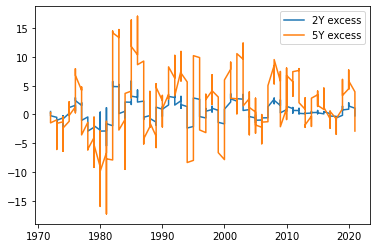

In [23]:
plt.plot(x[12:], excess_2y, label = '2Y excess')
plt.plot(x[12:], excess_5y , label = '5Y excess')
#plt.plot(x[12:], excess_10y, label = '10Y excess')

# # plt.plot(x_excess, excess_5y , label = '5Y excess')
# # plt.plot(x_excess, excess_7y , label = '7Y excess')
# plt.plot(x_excess, excess_10y, label = '10Y excess')
plt.legend()
plt.savefig('Excess Return.pdf')

In [24]:
# fig, (ax1, ax2, ax3) = plt.subplots(1,3)
# fig.set_size_inches(25,5.5)

# ax1.plot(x_excess, excess_2y, label = '2Y excess return', linewidth = 1.5)
# ax2.plot(x_excess, excess_5y, label = '5Y excess return', linewidth =2, color = 'red')
# ax3.plot(x_excess, excess_10y, label = '10y excess return', linewidth = 2, color = 'green')

# ax1.legend()
# ax2.legend()
# ax3.legend()

### Smoothing the time-series

In [68]:
def smooothing_moving_average(xret):
    rolling = xret.rolling(window=6)
    rolling_mean = rolling.mean()
    xret.plot(label = 'ret')
    rolling_mean.plot(color = 'red', label = 'smoothed')
    plt.legend()
    return 

In [73]:
# smooothing_moving_average(excess_2y)
# smooothing_moving_average(excess_5y)
# smooothing_moving_average(excess_10y)